Kernel : base (Python 3.9.7) conda environnement

# I. INSTALLER ENVIRONNEMENT DE TRAVAIL

Installer packages/librairies nécessaires

In [1]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import os
from os import listdir
import missingno as msno
from zipfile import ZipFile
import requests
import math
import datetime

palette

In [2]:
jaune ='#FFCA18'
rouge ='#88001B'
bleu ='#000064'
vert ='#055D00'
choco = '#4b2312'
pastel = ['#FFE06F','#FF9594','#78CF80','#FFB178','#A7B9FF','#FDE8D8']
pastel2 = [rouge, jaune, bleu, vert, choco]

Definir l'environnement de travail

In [3]:
path_to_dir=os.path.abspath(os.getcwd())

Créer un sous-dossier 'images' dans le dossier de travail

In [4]:
directory = 'images'
images = os.path.join(path_to_dir, directory)

try: 
    os.mkdir(images) 
except OSError as error: 
    print(error)

[WinError 183] Impossible de créer un fichier déjà existant: 'c:\\Users\\denis\\OneDrive\\Documents\\Denis\\Formation_OpenClassRooms\\Projet5\\images'


ouvrir dossier zip <br>
/!\ penser à l'enregistrer dans le dossier de travail!

In [5]:
file_name = "archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipo:
    # printing all the contents of the zip file
    zipo.printdir()
  
    # extracting all the files
    zipo.extractall()

File Name                                             Modified             Size
olist_customers_dataset.csv                    2021-10-01 19:08:42      9033957
olist_geolocation_dataset.csv                  2021-10-01 19:08:44     61273883
olist_order_items_dataset.csv                  2021-10-01 19:08:48     15438671
olist_order_payments_dataset.csv               2021-10-01 19:08:50      5777138
olist_order_reviews_dataset.csv                2021-10-01 19:08:52     14451670
olist_orders_dataset.csv                       2021-10-01 19:08:52     17654914
olist_products_dataset.csv                     2021-10-01 19:08:54      2379446
olist_sellers_dataset.csv                      2021-10-01 19:08:56       174703
product_category_name_translation.csv          2021-10-01 19:08:56         2613


Lister tous les fichiers csv presents dans le repertoire de travail.

In [6]:
def csv_files(path_to_dir=path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]


csv_files()

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

exemple : ouvrir un fichier csv

In [7]:
df = pd.read_csv(csv_files()[8], sep=',',quotechar='"')

In [8]:
df.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# /!\ Créer un dico regroupant tous les df

plus facile à lire et à appeler

In [9]:
dic = {}
l = ['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 
'order_reviews', 'products', 'sellers', 'translation']
for elt, i in zip(csv_files(), l):
    dic[i] = pd.read_csv(elt, sep=',')


In [10]:
dic.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'translation'])

# II. OUVERTURE DE CHAQUE DF

In [11]:
dic['customers'].head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [12]:
dic['customers'].shape

(99441, 5)

In [13]:
dic['customers']['customer_id'].nunique(), dic['customers']['customer_unique_id'].nunique()

(99441, 96096)

In [14]:
dic['geolocation'].head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [15]:
dic['geolocation'].shape

(1000163, 5)

In [16]:
dic['order_payments'].head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


# III. CREATION D'UN DF UNIQUE

# /!\ On part de df 'customers'

ça marche comme des tables SQL

In [17]:
dic['customers']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [18]:
dic['customers']['customer_unique_id'].nunique()

96096

In [19]:
dic['orders'].shape

(99441, 8)

merge customers & orders

In [20]:
df2 = dic['customers'].merge(dic["orders"], on='customer_id', how='left')

In [21]:
dic.keys()

dict_keys(['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'translation'])

In [22]:
dic["orders"].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [23]:
dic['customers'].shape, dic['orders'].shape

((99441, 5), (99441, 8))

In [24]:
dic['customers']['customer_id'].nunique()

99441

vérif si diff ds les 2 col customers_id

In [25]:
E = set(dic['customers']['customer_id'])
F = set(dic['orders']['customer_id'])
G = E - F
G

set()

ok, col identiques

In [26]:
df2.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

In [27]:
df2.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


ok, même nombre de lignes

In [28]:
df2.shape, dic['customers'].shape

((99441, 12), (99441, 5))

In [29]:
df2['customer_unique_id'].nunique()

96096

In [30]:
df2['customer_zip_code_prefix'].nunique()

14994

nb : moins de zip_code que de customer_unique_id

/!\ la col 'customer_unique_id' regroupe que des customers uniques (comme indiqué!...)

In [31]:
(df2.shape[0]-df2['customer_unique_id'].nunique())/df2.shape[0]*100

3.3638036624732255

on retrouve les 3% de customers unique

# on retire les col inutiles (je souhaite garder la géolocalité mais pas avec le zip_code) <br>
# /!\ récup long et lat de 'geolocalisation'

In [32]:
dic['geolocation'].head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


# /!\ Il faut faire un groupby(state) + agg(mean) pour moyenner la lat et la long

In [33]:
df_geol = dic['geolocation'].groupby(by=['geolocation_state'], as_index=False).agg({'geolocation_lat': 'mean', 'geolocation_lng': 'mean'})

In [34]:
df_geol.head(3)

,geolocation_state,geolocation_lat,geolocation_lng
0,AC,-9.702555,-68.451852
1,AL,-9.599729,-36.052017
2,AM,-3.349336,-60.537430


In [35]:
df_geol['geolocation_lng'].min()

-68.4518519482381

In [36]:
df_geol['geolocation_state'].nunique(), df2['customer_state'].nunique()

(27, 27)

In [37]:
df2 = df2.drop(columns=['customer_city', 'order_approved_at'])

In [38]:
df2 = df2.rename(columns={"customer_state": 'geolocation_state'})

In [39]:
df2.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_state,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00


In [40]:
df3 = df2.merge(df_geol, on='geolocation_state', how='left')

In [41]:
df3 = df3.drop(columns=['customer_zip_code_prefix', 'geolocation_state'])

In [42]:
df3.head(3)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,-23.155308,-47.084074
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,-23.155308,-47.084074
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,-23.155308,-47.084074


In [43]:
df3.shape

(99441, 10)

# on merge séparemment dans df_  : orders et order_reviews

In [44]:
df_ = dic['orders'].merge(dic['order_reviews'], on='order_id', how='left')

In [45]:
dic['order_reviews'].head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [46]:
dic['order_reviews'].shape, dic['orders'].shape

((99224, 7), (99441, 8))

plus de lignes dans tables 'orders'

In [47]:
dic['order_reviews']['order_id'].nunique(), dic['orders']['order_id'].nunique()

(98673, 99441)

plus d'entrées uniques des orders_id dans la tables orders que dans la table orders_reviews : des commandes sans review_score?

In [48]:
df_.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [49]:
df_['order_id'].nunique()

99441

groubp + agg() pour faire les moy sur le review_score => df2_

In [50]:
df2_ = df_.groupby(by=['order_id'], as_index=False).agg({"review_score":'mean'})

In [51]:
df2_.head(3)

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0


In [52]:
df2_.shape, df3.shape

((99441, 2), (99441, 10))

parfait, même nombre de lignes!

merge df3 et df2_ => df4

In [53]:
df4 = df3.merge(df2_, on='order_id', how='left')

In [54]:
df4.shape

(99441, 11)

pas d'ajout de lignes : ok

In [55]:
df4.head(3)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,-23.155308,-47.084074,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,-23.155308,-47.084074,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,-23.155308,-47.084074,5.0


# On veut récupérer les infos d'order_payments mais il faut aggréger les infos

In [56]:
dic['order_payments'].head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [57]:
dic['order_payments'].shape

(103886, 5)

groupby dic['order_payments'] et agg sur plusieurs features

In [58]:
df5 = dic['order_payments'].groupby(by=['order_id'], as_index=False).agg({'payment_sequential':'max', 'payment_value':'sum', 'payment_installments':'max'})

In [59]:
df5.shape, df4.shape

((99440, 4), (99441, 11))

In [60]:
A = set(df5['order_id'])
B = set(df4['order_id'])
C = B - A
C

{'bfbd0f9bdef84302105ad712db648a6c'}

Merge df4 et df5

In [61]:
df6 = df4.merge(df5, on='order_id', how='left')

In [62]:
df6.head(3)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng,review_score,payment_sequential,payment_value,payment_installments
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,-23.155308,-47.084074,4.0,1.0,146.87,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,-23.155308,-47.084074,5.0,1.0,335.48,8.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,-23.155308,-47.084074,5.0,1.0,157.73,7.0


on vérifie {'bfbd0f9bdef84302105ad712db648a6c'}

In [63]:
df6[df6['order_id']=='bfbd0f9bdef84302105ad712db648a6c'] #ok, NaN pour les infos payments

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng,review_score,payment_sequential,payment_value,payment_installments
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,-23.155308,-47.084074,1.0,NaN,NaN,NaN


In [64]:
df6.shape

(99441, 14)

Dumisation col 'order_status'

In [65]:
df7 = pd.get_dummies(df6, columns=['order_status'])

In [66]:
df7.head(3)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng,review_score,...,payment_value,payment_installments,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,-23.155308,-47.084074,4.0,...,146.87,2.0,0,0,0,1,0,0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,-23.155308,-47.084074,5.0,...,335.48,8.0,0,0,0,1,0,0,0,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,-23.155308,-47.084074,5.0,...,157.73,7.0,0,0,0,1,0,0,0,0


In [67]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    99441 non-null  object 
 1   customer_unique_id             99441 non-null  object 
 2   order_id                       99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_delivered_carrier_date   97658 non-null  object 
 5   order_delivered_customer_date  96476 non-null  object 
 6   order_estimated_delivery_date  99441 non-null  object 
 7   geolocation_lat                99441 non-null  float64
 8   geolocation_lng                99441 non-null  float64
 9   review_score                   98673 non-null  float64
 10  payment_sequential             99440 non-null  float64
 11  payment_value                  99440 non-null  float64
 12  payment_installments           99440 non-null 

Convertir les col date (txt) en datetime

In [68]:
df7["order_purchase_timestamp"] = pd.to_datetime(df7["order_purchase_timestamp"])
df7["order_delivered_carrier_date"] = pd.to_datetime(df7["order_delivered_carrier_date"])
df7["order_delivered_customer_date"] = pd.to_datetime(df7["order_delivered_customer_date"])
df7["order_estimated_delivery_date"] = pd.to_datetime(df7["order_estimated_delivery_date"])

In [69]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    99441 non-null  object        
 1   customer_unique_id             99441 non-null  object        
 2   order_id                       99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 5   order_delivered_customer_date  96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 7   geolocation_lat                99441 non-null  float64       
 8   geolocation_lng                99441 non-null  float64       
 9   review_score                   98673 non-null  float64       
 10  payment_sequential             99440 non-null  float64       
 11  payment_value  

In [70]:
df7.head(3)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,geolocation_lat,geolocation_lng,review_score,...,payment_value,payment_installments,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,-23.155308,-47.084074,4.0,...,146.87,2.0,0,0,0,1,0,0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,-23.155308,-47.084074,5.0,...,335.48,8.0,0,0,0,1,0,0,0,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,-23.155308,-47.084074,5.0,...,157.73,7.0,0,0,0,1,0,0,0,0


In [71]:
df7.shape, df7['customer_id'].nunique(), df7['customer_unique_id'].nunique()

((99441, 21), 99441, 96096)

/!\ il faudra faire un groupby sur les customer_unique_id

# IV. Creation d'un new df (RFM segmentation)

F = frequency (nb d'achat par client) <br>
R = recency (le dernier achat effectué pour chq client) <br>
M = money (la quantité dépensée par client)

on va rajouter une col Satisfaction à partir de la col review_score

# feature engineering = creation de new features (RFM)

In [72]:
df8 = df7.copy()

current = date à l'instant t de l'analyse (aujourd'hui)

In [73]:
current = np.datetime64(datetime.datetime.now())

In [74]:
df8.columns

Index(['customer_id', 'customer_unique_id', 'order_id',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'geolocation_lat', 'geolocation_lng', 'review_score',
       'payment_sequential', 'payment_value', 'payment_installments',
       'order_status_approved', 'order_status_canceled',
       'order_status_created', 'order_status_delivered',
       'order_status_invoiced', 'order_status_processing',
       'order_status_shipped', 'order_status_unavailable'],
      dtype='object')

on rajoute la col last_purchase qui nous permettra de rajouter la col recency
la col delta_delivering correspond au temps entre la commande et la réception de celle-ci par le client (doit probablement être corrélée)

In [75]:
df8.insert(4, 'last_purchase', current-df8['order_purchase_timestamp'])
df8.insert(8, 'delta_delivering', df8['order_delivered_customer_date']-df8['order_purchase_timestamp'])

In [76]:
df8.head(3)

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,last_purchase,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_delivering,geolocation_lat,...,payment_value,payment_installments,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2142 days 17:41:52.399985,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,8 days 19:30:00,-23.155308,...,146.87,2.0,0,0,0,1,0,0,0,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,1901 days 11:59:03.399985,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,16 days 15:52:55,-23.155308,...,335.48,8.0,0,0,0,1,0,0,0,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,1774 days 16:39:42.399985,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,26 days 01:51:06,-23.155308,...,157.73,7.0,0,0,0,1,0,0,0,0


In [77]:
df8.describe().T

,count,mean,std,min,25%,50%,75%,max
last_purchase,99441,1914 days 00:04:14.623403904,153 days 16:03:38.785401016,1623 days 15:17:09.399985,1789 days 17:05:11.399984992,1895 days 09:42:51.399984992,2023 days 18:01:08.399984992,2396 days 11:32:08.399985
delta_delivering,96476,12 days 13:24:31.879068369,9 days 13:07:00.181125305,0 days 12:48:07,6 days 18:23:37.250000,10 days 05:13:34,15 days 17:17:16.250000,209 days 15:05:12
geolocation_lat,99441.0,-21.166347,5.50597,-29.679191,-23.155308,-23.155308,-19.864647,2.7171
geolocation_lng,99441.0,-46.210262,3.884026,-68.451852,-47.084074,-47.084074,-44.421615,-35.758866
review_score,98673.0,4.086793,1.346274,1.0,4.0,5.0,5.0,5.0
payment_sequential,99440.0,1.045515,0.382177,1.0,1.0,1.0,1.0,29.0
payment_value,99440.0,160.990267,221.951257,0.0,62.01,105.29,176.97,13664.08
payment_installments,99440.0,2.930521,2.715685,0.0,1.0,2.0,4.0,24.0
order_status_approved,99441.0,0.00002,0.004485,0.0,0.0,0.0,0.0,1.0
order_status_canceled,99441.0,0.006285,0.07903,0.0,0.0,0.0,0.0,1.0


/!\ groupby sur customer_unique_id puis agg sur qq features

finalement je choisis de ne pas garder l'info sur les orders_status (beaucoup de col pour pas gd chose à tirer)

je décide de garder les infos sur payments_value et delta_delivering

In [78]:
df9 = df8.groupby(by=['customer_unique_id'], as_index=False).agg({"review_score":'mean', 
                                                                  'last_purchase': 'min',
                                                                  'order_id': 'count',
                                                                  'payment_value': 'sum', #faire sur sum : on somme les dépenses
                                                                  'delta_delivering': 'mean',
                                                                  'payment_installments': 'mean',
                                                                  'payment_sequential' : 'mean', #rajouté
                                                                  'geolocation_lat': 'mean',
                                                                  'geolocation_lng': 'mean'})

# /!\ vérif si 'order_id':'count' a bien marché

In [79]:
df9['order_id'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17], dtype=int64)

on monte jusqu'à 17 commandes pour un client!

In [80]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   customer_unique_id    96096 non-null  object         
 1   review_score          95380 non-null  float64        
 2   last_purchase         96096 non-null  timedelta64[ns]
 3   order_id              96096 non-null  int64          
 4   payment_value         96096 non-null  float64        
 5   delta_delivering      93356 non-null  timedelta64[ns]
 6   payment_installments  96095 non-null  float64        
 7   payment_sequential    96095 non-null  float64        
 8   geolocation_lat       96096 non-null  float64        
 9   geolocation_lng       96096 non-null  float64        
dtypes: float64(6), int64(1), object(1), timedelta64[ns](2)
memory usage: 7.3+ MB


In [81]:
df9.head(3)

,customer_unique_id,review_score,last_purchase,order_id,payment_value,delta_delivering,payment_installments,payment_sequential,geolocation_lat,geolocation_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1783 days 21:51:00.399985,1,141.90,6 days 09:52:10,8.0,1.0,-23.155308,-47.084074
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1786 days 21:36:00.399985,1,27.19,3 days 06:51:15,1.0,1.0,-23.155308,-47.084074
2,0000f46a3911fa3c0805444483337064,3.0,2209 days 11:42:24.399985,1,86.22,25 days 17:33:44,8.0,1.0,-27.222486,-49.617937


Verif si ok dans les 2 tables df8 et df9

In [82]:
df9[df9['order_id']==9]

,customer_unique_id,review_score,last_purchase,order_id,payment_value,delta_delivering,payment_installments,payment_sequential,geolocation_lat,geolocation_lng
23472,3e43e6105506432c953e165fb2acf44c,2.777778,1855 days 14:10:48.399985,9,1172.66,14 days 03:05:41.777777777,7.111111,1.0,-23.155308,-47.084074


In [83]:
df8[df8['customer_unique_id']=='3e43e6105506432c953e165fb2acf44c']

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,last_purchase,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delta_delivering,geolocation_lat,...,payment_value,payment_installments,order_status_approved,order_status_canceled,order_status_created,order_status_delivered,order_status_invoiced,order_status_processing,order_status_shipped,order_status_unavailable
5113,f37a14140ac3a8efbb4d2eab6585edb7,3e43e6105506432c953e165fb2acf44c,ed92e8596b1e39671065510a4f5b0920,2018-02-20 10:45:22,1862 days 22:02:05.399985,2018-03-07 19:58:53,2018-03-15 21:21:45,2018-03-14,23 days 10:36:23,-23.155308,...,76.17,3.0,0,0,0,1,0,0,0,0
6129,a4413edae691fd0d28bd04b8a38b259d,3e43e6105506432c953e165fb2acf44c,e23ad32d5c15d9ad308baddc6262afea,2017-12-01 09:30:36,1943 days 23:16:51.399985,2017-12-13 19:41:21,2017-12-27 17:22:30,2018-01-09,26 days 07:51:54,-23.155308,...,115.40,8.0,0,0,0,1,0,0,0,0
8657,1815fdaaae692479110428598596b5e5,3e43e6105506432c953e165fb2acf44c,ff89ef7b3952bba5ac06d61c4a79ffbe,2018-02-27 18:36:39,1855 days 14:10:48.399985,2018-03-01 01:11:25,2018-03-13 23:44:26,2018-03-19,14 days 05:07:47,-23.155308,...,123.69,8.0,0,0,0,1,0,0,0,0
10685,e68e6423401e85c138229b23d4bf4761,3e43e6105506432c953e165fb2acf44c,826b47e4cd7bba4e4c6fa5485f898b74,2017-12-01 22:37:42,1943 days 10:09:45.399985,2017-12-05 20:59:00,2017-12-06 19:09:43,2017-12-27,4 days 20:32:01,-23.155308,...,364.18,10.0,0,0,0,1,0,0,0,0
20597,b63c9cfc5dcb06ed307ca95957fa216c,3e43e6105506432c953e165fb2acf44c,caf10b4f81696bae84a2448c0767b3b0,2018-01-11 10:56:15,1902 days 21:51:12.399985,2018-01-13 01:13:05,2018-01-16 19:07:03,2018-01-26,5 days 08:10:48,-23.155308,...,132.95,10.0,0,0,0,1,0,0,0,0
50029,2bbd32d4ef14893d2d8c1a0df08403cf,3e43e6105506432c953e165fb2acf44c,70863e8ef99613bbc8f854807d187ea7,2018-02-12 10:12:54,1870 days 22:34:33.399985,2018-02-16 01:49:11,2018-02-27 22:09:24,2018-03-06,15 days 11:56:30,-23.155308,...,130.58,5.0,0,0,0,1,0,0,0,0
64987,b70f8552b91ef49129519206966e2472,3e43e6105506432c953e165fb2acf44c,1124c329070977fbd414f046bba149d7,2017-12-01 22:37:41,1943 days 10:09:46.399985,2017-12-04 22:09:20,2017-12-19 19:15:14,2018-01-02,17 days 20:37:33,-23.155308,...,65.10,6.0,0,0,0,1,0,0,0,0
89979,6b92dda6e324283dbe4969c443e3bf1a,3e43e6105506432c953e165fb2acf44c,f75455b78762d30c7e663172f18dbcbe,2018-02-12 10:12:55,1870 days 22:34:32.399985,2018-02-14 22:09:36,2018-02-27 23:07:45,2018-03-06,15 days 12:54:50,-23.155308,...,65.87,5.0,0,0,0,1,0,0,0,0
90706,06ec7aed3161859018db02f695b6600d,3e43e6105506432c953e165fb2acf44c,ed0b6f8c8617370e53735a5d963bb5b6,2017-09-18 18:53:15,2017 days 13:54:12.399985,2017-09-20 17:22:30,2017-09-22 20:56:45,2017-09-28,4 days 02:03:30,-23.155308,...,98.72,9.0,0,0,0,1,0,0,0,0


In [84]:
dic['order_payments'][dic['order_payments']['order_id']=='b81ef226f3fe1789b1e8b2acac839d17']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


ok, vérif faite : le groupby + agg a bien fctionné!

In [85]:
df10 = df9.rename(columns={'customer_unique_id': "Customer", 'review_score': 'Satisfaction',
                           'last_purchase': 'Recency', 'order_id': 'Frequency', 'payment_value': 'Money',
                           'delta_delivering': 'Delta_deliv', 'payment_installments': 'Pay_installments', 
                           'payment_sequential' : 'Pay_sequential', 'geolocation_lat': 'Lat', 'geolocation_lng': 'Long'})

changer le nom des col pour plus coller avec RFM

In [86]:
df10.head(3)

,Customer,Satisfaction,Recency,Frequency,Money,Delta_deliv,Pay_installments,Pay_sequential,Lat,Long
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1783 days 21:51:00.399985,1,141.90,6 days 09:52:10,8.0,1.0,-23.155308,-47.084074
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1786 days 21:36:00.399985,1,27.19,3 days 06:51:15,1.0,1.0,-23.155308,-47.084074
2,0000f46a3911fa3c0805444483337064,3.0,2209 days 11:42:24.399985,1,86.22,25 days 17:33:44,8.0,1.0,-27.222486,-49.617937


# V. Mise en forme du df (gestion Nan, valeurs abérantes, log2)

V.1 Creation de df11 (données brutes, sans log2)

In [87]:
df10.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,95380.0,4.084963,1.341661,1.0,4.0,5.0,5.0,5.0
Recency,96096,1911 days 20:07:07.744120032,153 days 09:59:29.882079690,1623 days 15:17:09.399985,1787 days 12:32:37.649984992,1892 days 13:08:11.399984992,2020 days 23:43:10.149984992,2396 days 11:32:08.399985
Frequency,96096.0,1.034809,0.214384,1.0,1.0,1.0,1.0,17.0
Money,96096.0,166.592492,231.428332,0.0,63.12,108.0,183.53,13664.08
Delta_deliv,93356,12 days 13:37:52.986191253,9 days 13:07:02.495152941,0 days 12:48:07,6 days 18:55:11,10 days 05:37:24.500000,15 days 17:14:50.750000,209 days 15:05:12
Pay_installments,96095.0,2.91745,2.693102,0.0,1.0,2.0,4.0,24.0
Pay_sequential,96095.0,1.044996,0.376499,1.0,1.0,1.0,1.0,29.0
Lat,96096.0,-21.15569,5.518844,-29.679191,-23.155308,-23.155308,-19.864647,2.7171
Long,96096.0,-46.206435,3.885243,-68.451852,-47.084074,-47.084074,-44.421615,-35.758866


# /!\ dropna()

In [88]:
df11 = df10.dropna()

In [89]:
df11.describe().T

,count,mean,std,min,25%,50%,75%,max
Satisfaction,92752.0,4.152329,1.28048,1.0,4.0,5.0,5.0,5.0
Recency,92752,1910 days 00:12:08.806261984,152 days 14:47:35.087707346,1624 days 12:31:25.399985,1786 days 12:23:25.149984992,1890 days 20:49:32.399984992,2018 days 10:09:52.649984992,2367 days 15:50:37.399985
Frequency,92752.0,1.035751,0.217345,1.0,1.0,1.0,1.0,17.0
Money,92752.0,165.378817,227.829616,9.59,63.1,107.85,182.69,13664.08
Delta_deliv,92752,12 days 12:39:39.944856937,9 days 11:02:40.457165511,0 days 12:48:07,6 days 18:43:22.750000,10 days 05:19:33.500000,15 days 16:01:03.750000,208 days 08:26:32
Pay_installments,92752.0,2.912969,2.687959,0.0,1.0,2.0,4.0,24.0
Pay_sequential,92752.0,1.044656,0.364835,1.0,1.0,1.0,1.0,26.0
Lat,92752.0,-21.170154,5.509695,-29.679191,-23.155308,-23.155308,-19.864647,2.7171
Long,92752.0,-46.222717,3.883764,-68.451852,-47.084074,-47.084074,-44.421615,-35.758866


In [90]:
df11[df11['Lat']>0]

,Customer,Satisfaction,Recency,Frequency,Money,Delta_deliv,Pay_installments,Pay_sequential,Lat,Long
921,027b0a2a0630aa7439875c30b987bf99,5.0,1894 days 05:59:16.399985,1,71.14,32 days 18:34:06,1.0,1.0,0.086025,-51.234304
1096,02eb2837e7302e52e996ebb4515ac3c5,5.0,2203 days 21:11:27.399985,1,255.04,187 days 04:52:58,4.0,1.0,0.086025,-51.234304
3389,08e37284d5bd2834be3c71035e3d64a3,5.0,2244 days 11:11:22.399985,1,55.87,11 days 20:42:06,1.0,1.0,2.717100,-60.672866
3526,093afe7cac6e0472bc762f850cfac378,4.0,2182 days 21:15:19.399985,1,47.92,18 days 00:58:55,1.0,1.0,2.717100,-60.672866
5690,0f199a41b250c91989536f3a176e85b6,5.0,1736 days 10:47:15.399985,1,157.46,16 days 12:32:45,3.0,1.0,0.086025,-51.234304
...,...,...,...,...,...,...,...,...,...,...
87764,e9a79e74f1dcd2b7b6dbed7469326104,3.0,2004 days 16:12:49.399985,1,66.10,23 days 01:16:06,2.0,1.0,0.086025,-51.234304
90219,f03553cc2a5d9a0d2b945ccf7f4c54bc,5.0,1911 days 21:40:04.399985,1,1475.08,24 days 02:15:34,5.0,1.0,0.086025,-51.234304
91827,f48841d7d5532186af64171b32e23531,5.0,2146 days 11:21:46.399985,1,100.01,24 days 19:56:37,1.0,1.0,2.717100,-60.672866
92869,f73ed0685b8f4388b07d4838f60b3571,5.0,1786 days 22:04:13.399985,1,259.39,22 days 03:55:40,1.0,1.0,0.086025,-51.234304


In [91]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92752 entries, 0 to 96095
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Customer          92752 non-null  object         
 1   Satisfaction      92752 non-null  float64        
 2   Recency           92752 non-null  timedelta64[ns]
 3   Frequency         92752 non-null  int64          
 4   Money             92752 non-null  float64        
 5   Delta_deliv       92752 non-null  timedelta64[ns]
 6   Pay_installments  92752 non-null  float64        
 7   Pay_sequential    92752 non-null  float64        
 8   Lat               92752 non-null  float64        
 9   Long              92752 non-null  float64        
dtypes: float64(6), int64(1), object(1), timedelta64[ns](2)
memory usage: 7.8+ MB


In [92]:
df11['Pay_installments'].max()

24.0

In [93]:
df11['Pay_sequential'].max()

26.0

<AxesSubplot:xlabel='Money', ylabel='Count'>

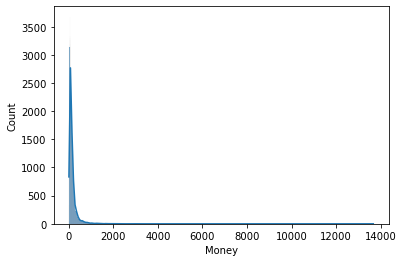

In [96]:
sns.histplot(df11['Money'], kde=True)

Money est très étalé : passer en log2? <br>
mieux de passer en log2 pour recency <br>
frequency idem, un peu étalé : log2


convertir les col timedelta en entier (plus facile à lire)

In [97]:
df11['Recency'] = df11['Recency'].astype('timedelta64[D]').astype(int)
df11['Delta_deliv'] = df11['Delta_deliv'].astype('timedelta64[D]').astype(int)

C:\Users\denis\AppData\Local\Temp/ipykernel_21072/3060709534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Recency'] = df11['Recency'].astype('timedelta64[D]').astype(int)
C:\Users\denis\AppData\Local\Temp/ipykernel_21072/3060709534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Delta_deliv'] = df11['Delta_deliv'].astype('timedelta64[D]').astype(int)


In [98]:
df11.head(3)

,Customer,Satisfaction,Recency,Frequency,Money,Delta_deliv,Pay_installments,Pay_sequential,Lat,Long
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1783,1,141.90,6,8.0,1.0,-23.155308,-47.084074
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1786,1,27.19,3,1.0,1.0,-23.155308,-47.084074
2,0000f46a3911fa3c0805444483337064,3.0,2209,1,86.22,25,8.0,1.0,-27.222486,-49.617937


<AxesSubplot:>

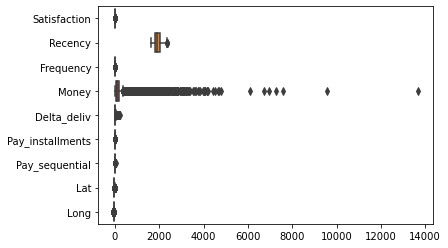

In [99]:
sns.boxplot(data=df11[df11.columns[1:]], orient="h")

<AxesSubplot:>

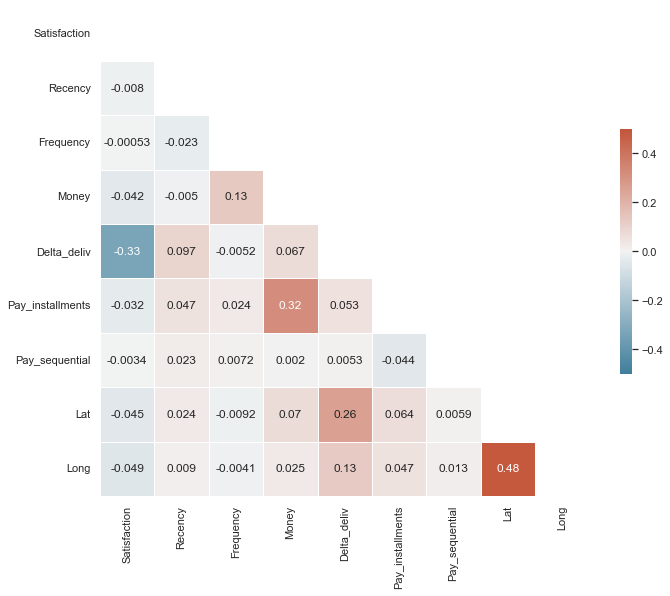

In [100]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df11.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

On confirme que pa_installments et money sont un peu corrélés <br>
idem que delta_deliv et satisfaction sont un peu anticorrélés.

# V.2 Creation de df12 (log2)

# /!\ creation d'un autre df avec log2

In [101]:
df12 = df10.copy()

In [102]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Customer          96096 non-null  object         
 1   Satisfaction      95380 non-null  float64        
 2   Recency           96096 non-null  timedelta64[ns]
 3   Frequency         96096 non-null  int64          
 4   Money             96096 non-null  float64        
 5   Delta_deliv       93356 non-null  timedelta64[ns]
 6   Pay_installments  96095 non-null  float64        
 7   Pay_sequential    96095 non-null  float64        
 8   Lat               96096 non-null  float64        
 9   Long              96096 non-null  float64        
dtypes: float64(6), int64(1), object(1), timedelta64[ns](2)
memory usage: 7.3+ MB


In [103]:
recency = df12['Recency'].astype('timedelta64[D]').astype(int)
#df12['Delta_deliv'] = df12['Delta_deliv'].astype('timedelta64[D]').astype(int)
df12.insert(2, 'Recency2', recency)
df12 = df12.drop(columns=['Recency'])

# /!\ Gestion des Nan et des valeurs abhérentes (Money=0)

In [104]:
df13 = df12.dropna()

In [105]:
df13.shape, df12.shape

((92752, 10), (96096, 10))

supprimer lignes qd money =0

In [106]:
df13 = df13[df13['Money']>0]

In [107]:
df13.shape

(92752, 10)

verif de pay_installments

In [108]:
df13[df13['Pay_installments']==0]

,Customer,Satisfaction,Recency2,Frequency,Money,Delta_deliv,Pay_installments,Pay_sequential,Lat,Long
57518,9925e1d7dff0d807355599dee04830ab,5.0,1778,1,129.94,8 days 23:20:27,0.0,2.0,-13.049361,-39.560649
92130,f54cea27c80dc09bfe07b1cf1e01b845,5.0,1801,1,58.69,5 days 09:20:46,0.0,2.0,-23.155308,-47.084074


supprimer ces 2 lignes (pour passer en log)

In [109]:
df13 = df13[df13['Pay_installments']>0]

In [110]:
df13.shape

(92750, 10)

In [111]:
df13['Delta_deliv'] = df13['Delta_deliv'].astype('timedelta64[D]').astype(float)

In [112]:
df13[df13['Delta_deliv']==0]

,Customer,Satisfaction,Recency2,Frequency,Money,Delta_deliv,Pay_installments,Pay_sequential,Lat,Long
7187,13071413b2d7b730db1cd98a4611f2b2,1.0,1736,1,765.84,0.0,6.0,1.0,-13.049361,-39.560649
41667,6ebecf9718a9fdd2d34ea36f36501420,5.0,2143,1,137.16,0.0,3.0,1.0,-23.155308,-47.084074
45160,781f80ac54444e4020dc3f70f044d8b3,3.0,2129,1,62.76,0.0,2.0,1.0,-23.155308,-47.084074
51451,88fbad05557cbc2d2f5fee59d6966716,4.0,1958,1,108.51,0.0,2.0,1.0,-23.155308,-47.084074
54931,92776276a13b6d52820b4014aa07250d,5.0,2127,1,58.62,0.0,1.0,2.0,-23.155308,-47.084074
55353,938e4b10f5b5ca81ab31b7c89367c559,5.0,1734,1,78.64,0.0,1.0,1.0,-23.155308,-47.084074
58101,9aa5b032a9157594cda43b16a832f738,5.0,1880,1,188.94,0.0,2.0,1.0,-23.155308,-47.084074
60473,a0fea4478b5357571900273006dd7cd6,5.0,2127,1,116.36,0.0,3.0,1.0,-23.155308,-47.084074
65414,adfcd54789b345d7242847c583b483cf,5.0,2109,1,355.20,0.0,5.0,1.0,-22.743477,-43.155540
73738,c4320fbd4bc46bc041e8c2b703a05cd6,3.0,2093,1,194.48,0.0,1.0,1.0,-23.155308,-47.084074


supprimer les 13 lignes pour lesquelles delta_deliv est nulles

In [113]:
df13 = df13[df13['Delta_deliv']>0]

In [114]:
df13.shape

(92737, 10)

<AxesSubplot:xlabel='Money', ylabel='Count'>

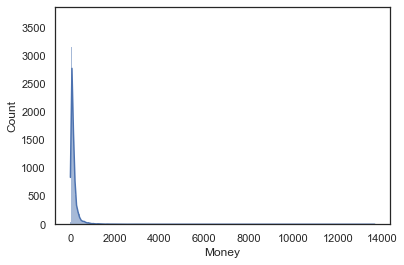

In [115]:
sns.histplot(df13['Money'], kde=True)

# Il faut faire une translation de lat de -5 pour pouvoir ensuite transformer en abs puis en log2. <br>
# En effet, max(lat) > 2.7 et min(lat) < -28

In [116]:
df13['Lat'] = df13['Lat'].apply(lambda x : x -5)

In [117]:
df13['Lat'] = df13['Lat'].abs()

passer long en abs pour pouvoir les passer en log2

In [118]:
df13['Long'] = df13['Long'].abs()

In [119]:
df13.insert(1, 'Log2_Satisf', np.log2(df13.pop('Satisfaction')))
df13.insert(3, 'Log2_Freq', np.log2(df13.pop('Frequency')))
df13.insert(4, 'Log2_Money', np.log2(df13.pop('Money')))
df13.insert(2, 'Log2_Recency', np.log2(df13.pop('Recency2')))
df13.insert(5, 'Log2_Delta_deliv', np.log2(df13.pop('Delta_deliv')))
df13.insert(6, 'Log2_Pay_installments', np.log2(df13.pop('Pay_installments')))
df13.insert(7, 'Log2_Pay_sequential', np.log2(df13.pop('Pay_sequential')))
df13.insert(8, 'Log2_|Lat-5|', np.log2(df13.pop('Lat')))
df13.insert(9, 'Log2_|Long|', np.log2(df13.pop('Long')))

In [120]:
df13.isna().sum().sum()

0

In [121]:
df13.describe().T

,count,mean,std,min,25%,50%,75%,max
Log2_Satisf,92737.0,1.930565,0.697572,0.000000,2.000000,2.321928,2.321928,2.321928
Log2_Recency,92737.0,10.894344,0.113888,10.665336,10.802516,10.884171,10.978710,11.208844
Log2_Freq,92737.0,0.033949,0.190677,0.000000,0.000000,0.000000,0.000000,4.087463
Log2_Money,92737.0,6.806497,1.178202,3.261531,5.979568,6.752882,7.513254,13.738101
Log2_Delta_deliv,92737.0,3.235709,1.052260,0.000000,2.584963,3.321928,3.906891,7.700440
Log2_Pay_installments,92737.0,1.038231,1.156655,0.000000,0.000000,1.000000,2.000000,4.584963
Log2_Pay_sequential,92737.0,0.036326,0.219915,0.000000,0.000000,0.000000,0.000000,4.700440
Log2_|Lat-5|,92737.0,4.661892,0.417559,1.190867,4.636024,4.815335,4.815335,5.115998
Log2_|Long|,92737.0,5.525328,0.123439,5.160229,5.473190,5.557167,5.557167,6.097018


<AxesSubplot:>

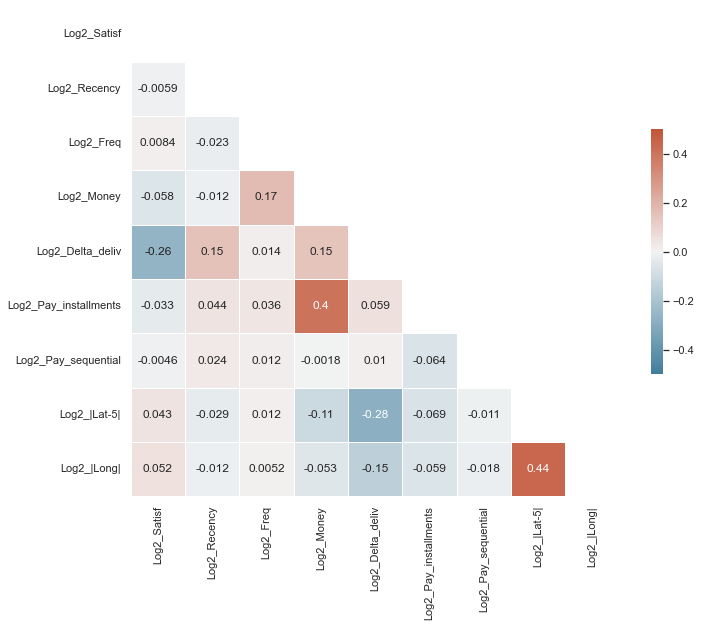

In [122]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df13.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, vmin=-0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [123]:
df13.columns[1]

'Log2_Satisf'

<AxesSubplot:xlabel='Log2_|Lat-5|', ylabel='Count'>

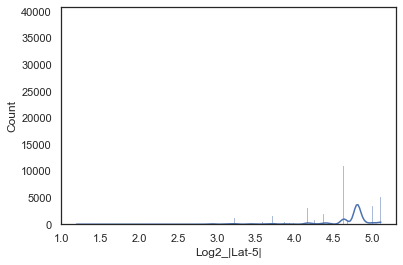

In [124]:
sns.histplot(df13[df13.columns[8]], kde=True)

<AxesSubplot:>

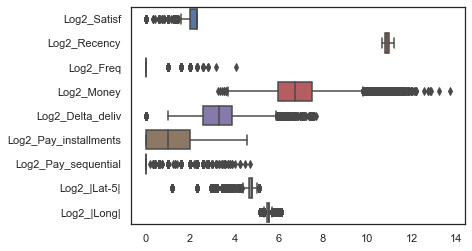

In [125]:
sns.boxplot(data=df13[df13.columns[1:]], orient="h")

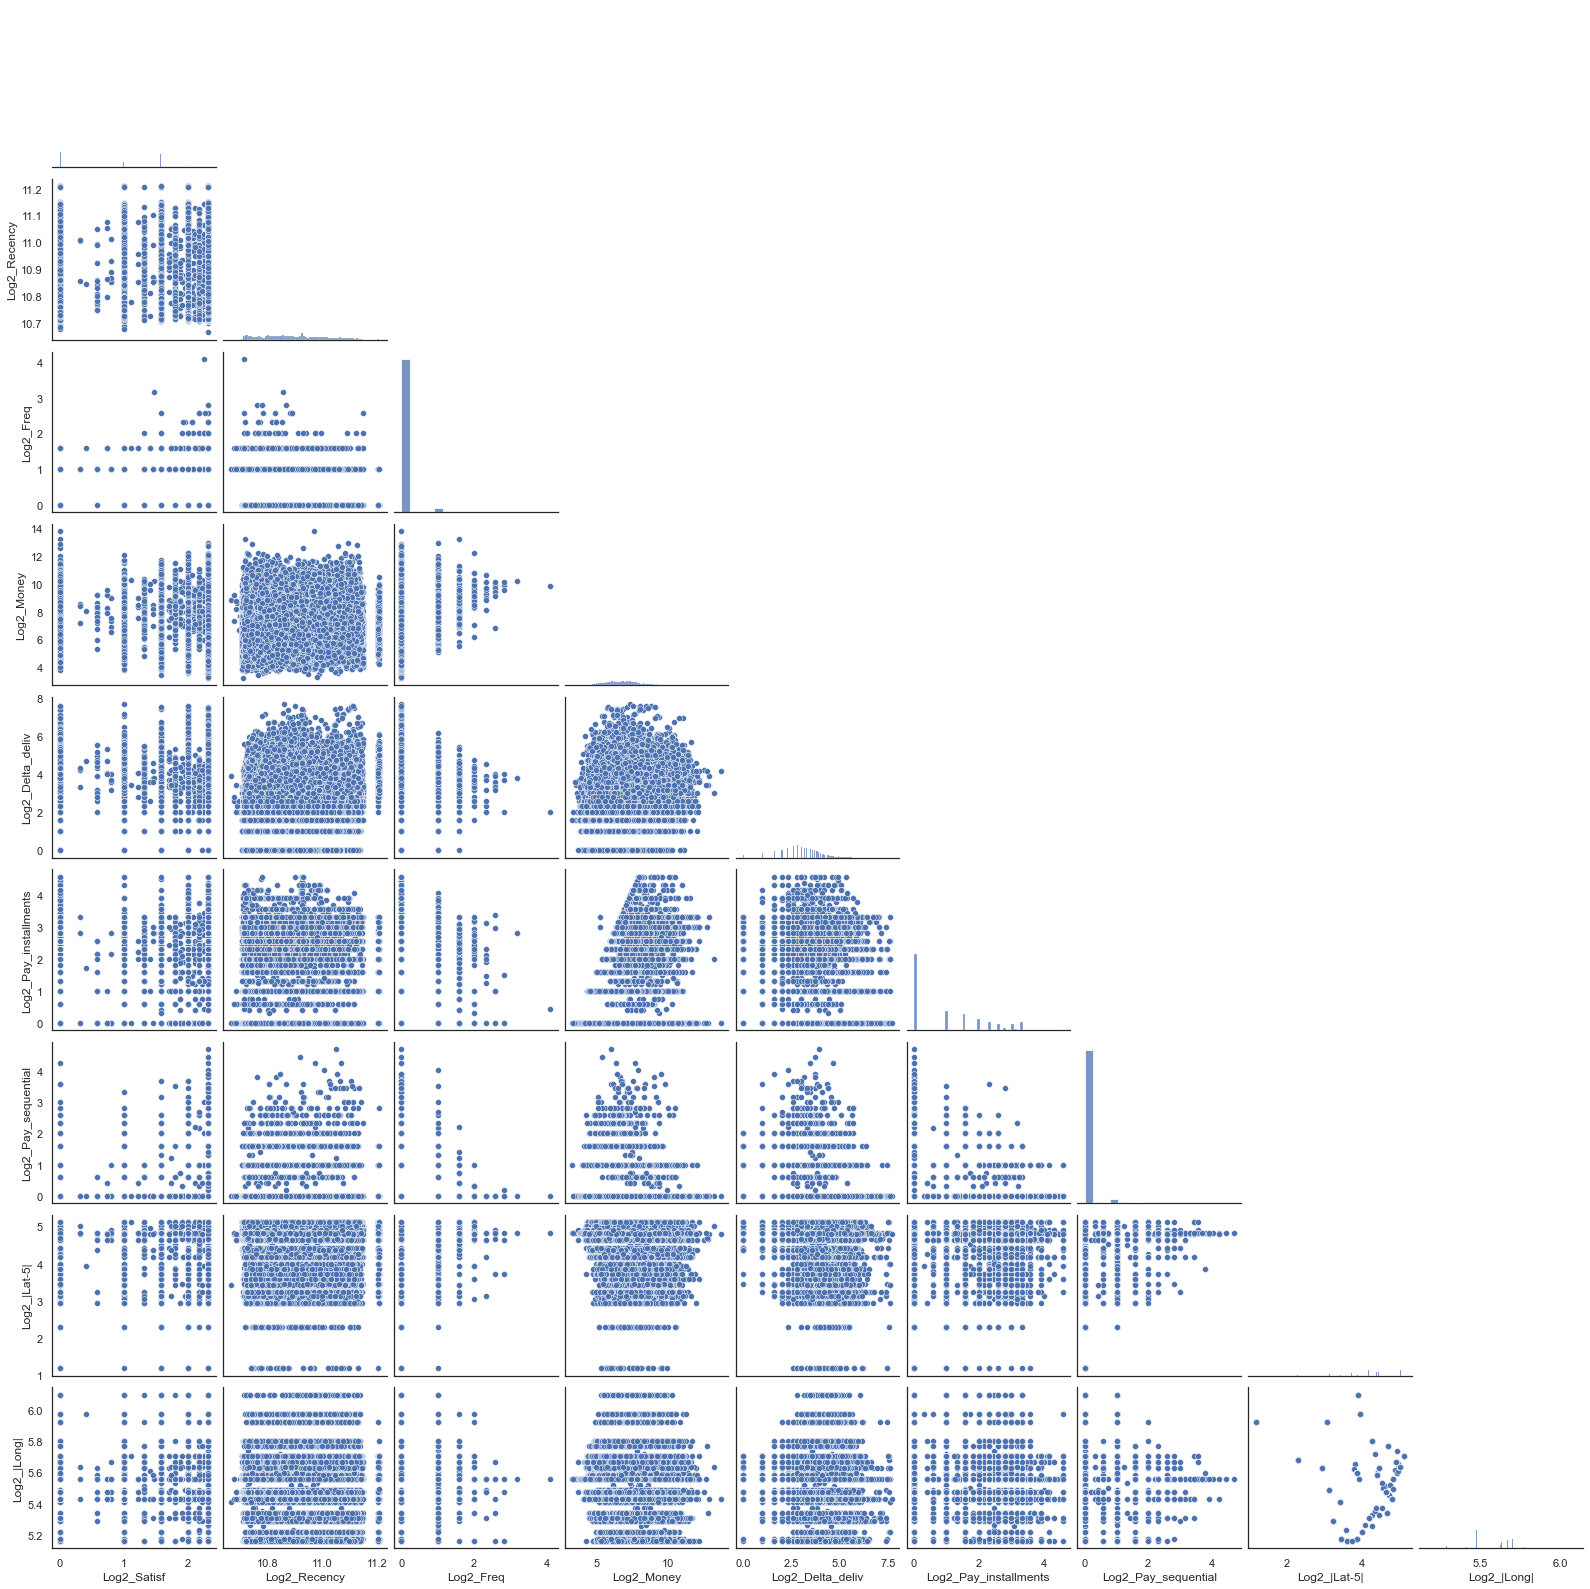

In [126]:
sns.pairplot(df13, palette=pastel2, corner=True)

# VI. Export les dfs en csv

VI.1 Export df13 pour notebook essais

In [127]:
os.makedirs(f'{path_to_dir}/export', exist_ok=True)  

df13.to_csv(f'{path_to_dir}/export/df13.csv', index=False) 

VI.2 Export df8 en csv pour notebook simulation

In [ ]:
os.makedirs(f'{path_to_dir}/export', exist_ok=True)  

df7.to_csv(f'{path_to_dir}/export/df7.csv', index=False) 